#🧪 Practical: Visualizing Time Series Trends and Seasonal Decomposition (Finance-based)

#📝 Objective:

Learn how to:

Load time series data

Visualize it

Perform decomposition to identify trend, seasonality, and residuals



#📦 Step 1: Install and Import Libraries

In [1]:
# Install yfinance if not already installed
!pip install yfinance --quiet

# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the plot style
sns.set(style="whitegrid")


#📈 Step 2: Load Financial Time Series Data (e.g., Apple stock)

In [2]:
# Download AAPL (Apple Inc.) historical data for the last 5 years
df = yf.download('AAPL', start='2020-01-01', end='2024-12-31')

# Display the first few rows
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146927,72.753808,71.926900,72.497514,108872000
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200


#📊 Step 3: Visualize the Closing Price Over Time



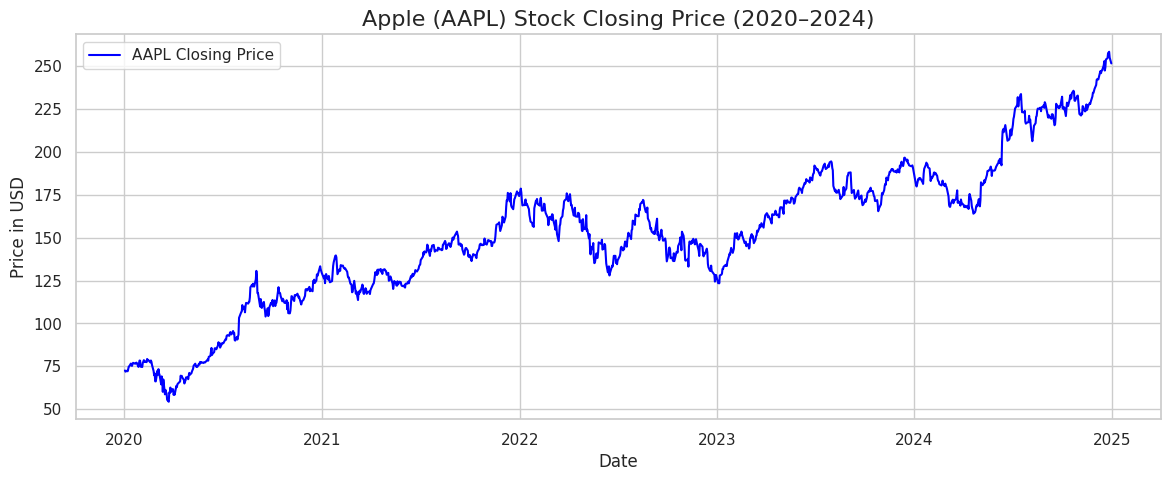

In [3]:
# Plot the closing price
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='AAPL Closing Price', color='blue')
plt.title('Apple (AAPL) Stock Closing Price (2020–2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()


#🛠️ Step 4: Resample the Data to Monthly Frequency
This helps smooth out daily fluctuations and highlight longer-term trends.

<ipython-input-4-cb51b96b6511>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df['Close'].resample('M').mean()


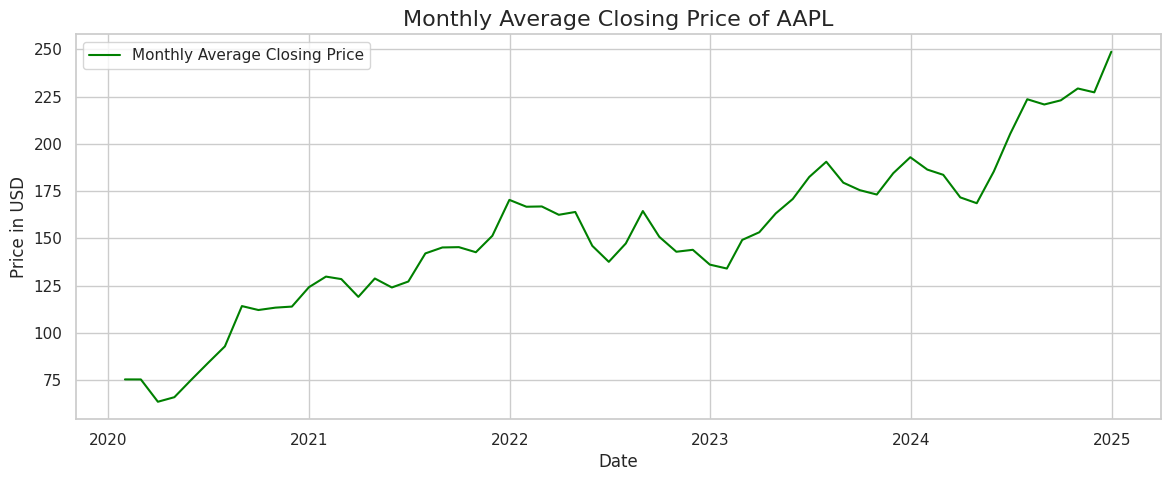

In [4]:
# Resample the data to monthly average
monthly_df = df['Close'].resample('M').mean()

# Plot the resampled data
plt.figure(figsize=(14, 5))
plt.plot(monthly_df, label='Monthly Average Closing Price', color='green')
plt.title('Monthly Average Closing Price of AAPL', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend()
plt.show()


#🧩 Step 5: Decompose the Time Series (Trend, Seasonality, Residuals)

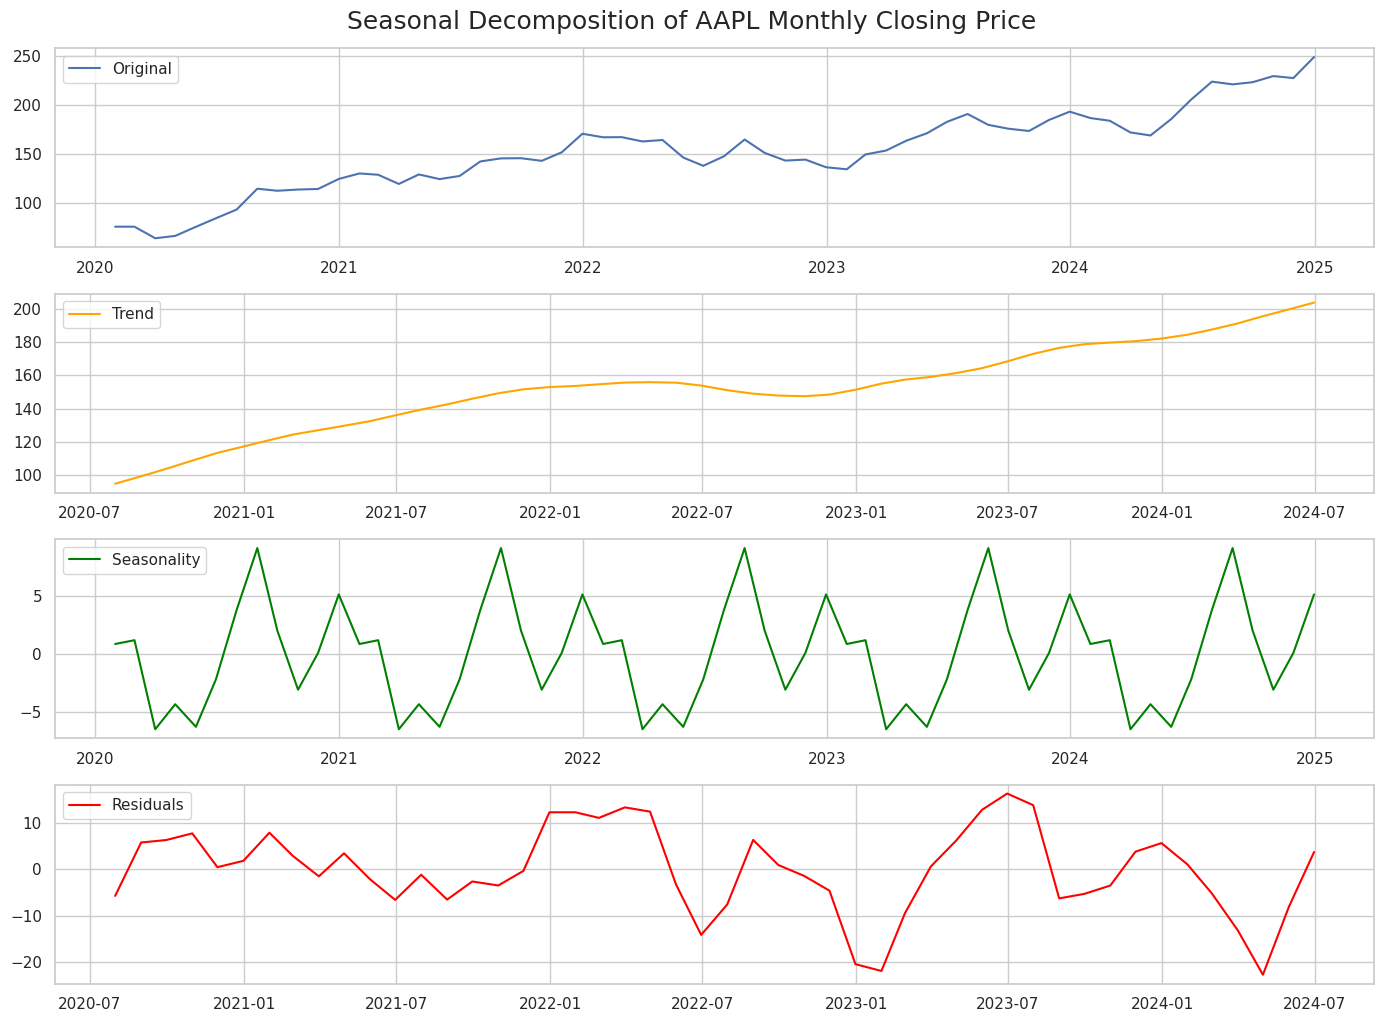

In [7]:
# Perform seasonal decomposition using additive model
# seasonal_decompose breaks down a time series into three components:
# Trend: The long-term progression or regression of the series.
# Seasonality: Repeating patterns or cycles within a fixed period (e.g., daily, monthly, yearly).
# Residuals: The random variation or noise in the series after trend and seasonal components are removed.
# model='additive' assumes that the components add up to form the original series: Original = Trend + Seasonality + Residuals.
decomposition = seasonal_decompose(monthly_df, model='additive')

# Plot the decomposed components
plt.figure(figsize=(14, 10)) # Create a figure with a specific size (width=14 inches, height=10 inches) for better visualization.

# Plotting the Original Series
plt.subplot(411) # Create a subplot grid (4 rows, 1 column, 1st plot).
plt.plot(monthly_df, label='Original') # Plot the original monthly closing price data.
plt.legend(loc='upper left') # Display the legend in the upper left corner.

# Plotting the Trend Component
plt.subplot(412) # Create the 2nd plot in the 4x1 grid.
plt.plot(decomposition.trend, label='Trend', color='orange') # Plot the extracted trend component.
plt.legend(loc='upper left') # Display the legend.

# Plotting the Seasonal Component
plt.subplot(413) # Create the 3rd plot in the 4x1 grid.
plt.plot(decomposition.seasonal, label='Seasonality', color='green') # Plot the extracted seasonal component.
plt.legend(loc='upper left') # Display the legend.

# Plotting the Residuals Component
plt.subplot(414) # Create the 4th plot in the 4x1 grid.
plt.plot(decomposition.resid, label='Residuals', color='red') # Plot the extracted residual component.
plt.legend(loc='upper left') # Display the legend.

plt.tight_layout() # Adjusts subplot parameters for a tight layout, preventing labels from overlapping.
# Add a super title for the entire figure, positioned slightly above the plots.
plt.suptitle('Seasonal Decomposition of AAPL Monthly Closing Price', fontsize=18, y=1.02)
plt.show() # Display the plot.

#📌 Interpretation:
Trend: Shows the overall direction of the stock price over time.

Seasonality: Captures repeating patterns (if any) in specific months or periods.

Residuals: Random noise or irregular variations not explained by trend or seasonality.



#🧠 Bonus: Decompose Using Multiplicative Model


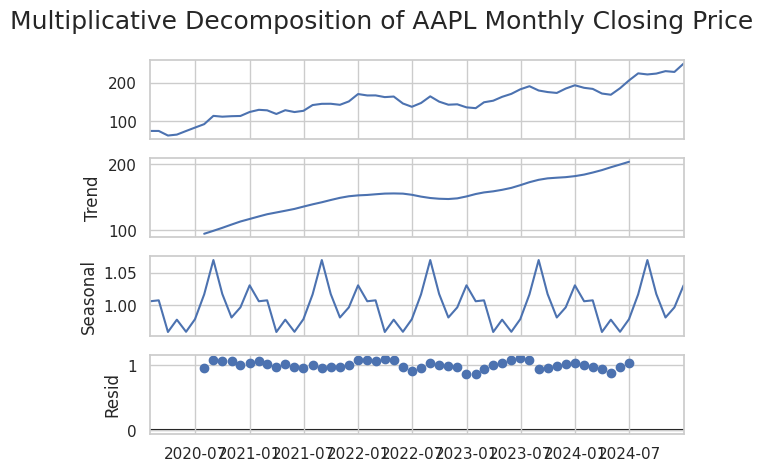

In [6]:
# Try multiplicative model if data shows exponential growth
multiplicative_decomp = seasonal_decompose(monthly_df, model='multiplicative')

# Plot multiplicative decomposition
multiplicative_decomp.plot()
plt.suptitle('Multiplicative Decomposition of AAPL Monthly Closing Price', fontsize=18)
plt.tight_layout()
plt.show()


#✅ Summary

| Step          | Description                                     |
| ------------- | ----------------------------------------------- |
| Load Data     | Used `yfinance` to fetch stock data             |
| Resample      | Converted daily data to monthly                 |
| Visualization | Line plots for raw and resampled data           |
| Decomposition | Applied both additive and multiplicative models |
